In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


In [2]:
class LeNet_BatchNorm(nn.Module):
    def __init__(self):
        
        super().__init__()
        self.convlayers = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.BatchNorm2d(6),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.BatchNorm2d(16),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.BatchNorm2d(120),
        )
        self.flatten = nn.Flatten()
        self.fc = nn.Sequential(nn.Linear(120, 84), nn.Tanh(), nn.BatchNorm1d(84), nn.Linear(84, 10), nn.Softmax(1))

    def forward(self, x):
        x = self.convlayers(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x


In [3]:
class LeNet_InputBatchNorm(nn.Module):
    def __init__(self):
        
        super().__init__()
        self.convlayers = nn.Sequential(
            nn.BatchNorm2d(1),
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.BatchNorm2d(6),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.BatchNorm2d(16),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.BatchNorm2d(120),
        )
        self.flatten = nn.Flatten()
        self.fc = nn.Sequential(nn.Linear(120, 84), nn.Tanh(), nn.BatchNorm1d(84), nn.Linear(84, 10), nn.Softmax(1))

    def forward(self, x):
        x = self.convlayers(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x


In [4]:
class LeNet_Dropout(nn.Module):
    def __init__(self):
        
        super().__init__()
        self.convlayers = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.Dropout(p=0.5),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.Dropout(p=0.5),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.Dropout(p=0.5),
        )
        self.flatten = nn.Flatten()
        self.fc = nn.Sequential(nn.Linear(120, 84), nn.Tanh(), nn.Dropout(p=0.5), nn.Linear(84, 10), nn.Softmax(1))

    def forward(self, x):
        x = self.convlayers(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x


In [5]:
class LeNet_DropoutBatchNorm(nn.Module):
    def __init__(self):
        
        super().__init__()
        self.convlayers = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.BatchNorm2d(6),
            nn.Dropout(p=0.5),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.BatchNorm2d(16),
            nn.Dropout(p=0.5),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.BatchNorm2d(120),
            nn.Dropout(p=0.5),
        )
        self.flatten = nn.Flatten()
        self.fc = nn.Sequential(nn.Linear(120, 84), nn.Tanh(), nn.BatchNorm1d(84), nn.Dropout(p=0.5), nn.Linear(84, 10), nn.Softmax(1))

    def forward(self, x):
        x = self.convlayers(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x


In [6]:
def train(model, dataloader, optimizer, device="cpu"):

    # store loss & accuracy for each epoch
    total_loss = 0.0
    total = 0.0
    correct = 0.0

    model.train()
    for images, labels in dataloader:

        # send stuff to device
        images, labels = images.to(device), labels.to(device)

        # forward pass
        preds = model(images)

        # compute loss
        loss = loss_fn(preds, labels)

        # gradient descent
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # loss and accuracy calculations
        total_loss += preds.shape[0] * loss.item()
        _, predicted = torch.max(preds.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = total_loss / total
    train_accuracy = correct / total

    print(f"[Training] Loss: {train_loss}, Accuracy: {train_accuracy}")

    return train_loss, train_accuracy


In [7]:
def validate(model, dataloader, device="cpu"):

    # store loss & accuracy for each epoch
    total_loss = 0.0
    total = 0.0
    correct = 0.0

    model.eval()
    with torch.no_grad():
        for images, labels in dataloader:

            # send stuff to device
            images, labels = images.to(device), labels.to(device)

            # forward pass
            preds = model(images)

            # compute loss
            loss = loss_fn(preds, labels)

            # loss and accuracy calculations
            total_loss += preds.shape[0] * loss.item()
            _, predicted = torch.max(preds.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = total_loss / total
    val_accuracy = correct / total

    print(f"[Validation] Loss: {val_loss}, Accuracy: {val_accuracy}")

    return val_loss, val_accuracy


In [8]:
batch_size = 128
device = "cuda" if torch.cuda.is_available() else "cpu"
epochs = 30
loss_fn = nn.CrossEntropyLoss()
lr = 0.001

In [9]:
# define appropriate transforms for each part
p2_transformations = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor(), transforms.Normalize(mean=(0.1307,), std=(0.3081,))])
p3_transformations = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor()])
p4_transformations = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor(), transforms.Normalize(mean=(0.1307,), std=(0.3081,))])
p5_transformations = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor(), transforms.Normalize(mean=(0.1307,), std=(0.3081,))])


#  Part 2

In [10]:
train_dataset = datasets.MNIST(root="MNIST", train=True, transform=p2_transformations, download=True)
val_dataset = datasets.MNIST(root="MNIST", train=False, transform=p2_transformations, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=True, num_workers=2)


In [11]:
p2_train_loss = []
p2_validation_loss = []
p2_train_accuracy = []
p2_validation_accuracy = []

model = LeNet_BatchNorm().to(device)
optimizer = optim.SGD(model.parameters(), lr=lr)


for epoch in range(epochs):

    # Training Phase
    print(f"[Training] Epoch: {epoch}")
    train_loss, train_acc = train(model, train_loader, optimizer, device)
    
    # Validation Phase
    print(f"[Validation] Epoch: {epoch}")
    val_loss, val_acc = validate(model, val_loader, device)

    p2_train_loss.append(train_loss)
    p2_validation_loss.append(val_loss)
    p2_train_accuracy.append(train_acc)
    p2_validation_accuracy.append(val_acc)


[Training] Epoch: 0
[Training] Loss: 2.1912475158691405, Accuracy: 0.3953
[Validation] Epoch: 0
[Validation] Loss: 2.065171508407593, Accuracy: 0.6163
[Training] Epoch: 1
[Training] Loss: 1.9882023515701295, Accuracy: 0.67495
[Validation] Epoch: 1
[Validation] Loss: 1.9151581041336059, Accuracy: 0.739
[Training] Epoch: 2
[Training] Loss: 1.8809271132787069, Accuracy: 0.75395
[Validation] Epoch: 2
[Validation] Loss: 1.837309568786621, Accuracy: 0.7941
[Training] Epoch: 3
[Training] Loss: 1.8198854155858357, Accuracy: 0.7981333333333334
[Validation] Epoch: 3
[Validation] Loss: 1.786248572731018, Accuracy: 0.8302
[Training] Epoch: 4
[Training] Loss: 1.7785647509892781, Accuracy: 0.82765
[Validation] Epoch: 4
[Validation] Loss: 1.7521583787918091, Accuracy: 0.8558
[Training] Epoch: 5
[Training] Loss: 1.7476040660222372, Accuracy: 0.84695
[Validation] Epoch: 5
[Validation] Loss: 1.7228047010421752, Accuracy: 0.8701
[Training] Epoch: 6
[Training] Loss: 1.7231437372843426, Accuracy: 0.8595833

In [12]:
print(model)

LeNet_BatchNorm(
  (convlayers): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (4): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (5): Tanh()
    (6): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (8): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (9): Tanh()
    (10): BatchNorm2d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): Tanh()
    (2): BatchNorm1d(84, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=84, out_features=10, bias=True)
    (4): Softmax(dim=1)
  )
)


In [13]:
bn_weights = [
    model.convlayers[2].weight.cpu().detach().numpy(),
    model.convlayers[6].weight.cpu().detach().numpy(),
    model.convlayers[10].weight.cpu().detach().numpy(),
    model.fc[2].weight.cpu().detach().numpy(),
]

bn_bias = [
    model.convlayers[2].bias.cpu().detach().numpy(),
    model.convlayers[6].bias.cpu().detach().numpy(),
    model.convlayers[10].bias.cpu().detach().numpy(),
    model.fc[2].bias.cpu().detach().numpy(),
]

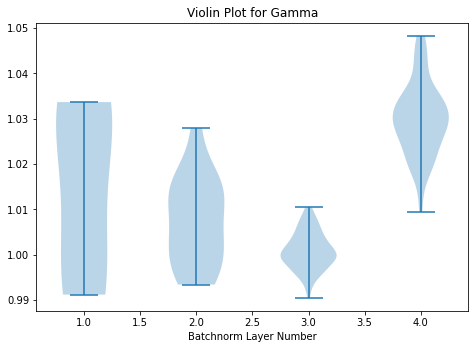

In [14]:
# violin plot for weights & biases
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gamma = ax.violinplot(bn_weights)

plt.title("Violin Plot for Gamma")
plt.xlabel("Batchnorm Layer Number")
plt.show()

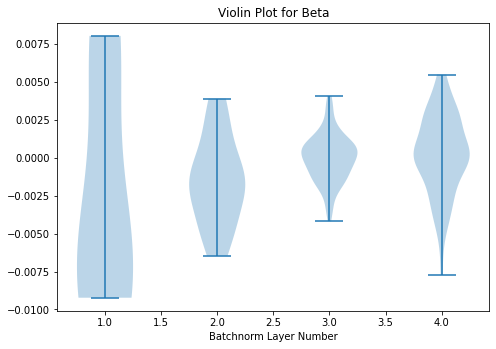

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
beta = ax.violinplot(bn_bias)
plt.title("Violin Plot for Beta")
plt.xlabel("Batchnorm Layer Number")
plt.show()

# Part 3

In [16]:
train_dataset = datasets.MNIST(root="MNIST", train=True, transform=p3_transformations, download=True)
val_dataset = datasets.MNIST(root="MNIST", train=False, transform=p3_transformations, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=True, num_workers=2)


In [17]:
p3_train_loss = []
p3_validation_loss = []
p3_train_accuracy = []
p3_validation_accuracy = []

model = LeNet_InputBatchNorm().to(device)
optimizer = optim.SGD(model.parameters(), lr=lr)


for epoch in range(epochs):

    # Training Phase
    print(f"[Training] Epoch: {epoch}")
    train_loss, train_acc = train(model, train_loader, optimizer, device)

    # Validation Phase
    print(f"[Validation] Epoch: {epoch}")
    val_loss, val_acc = validate(model, val_loader, device)

    p3_train_loss.append(train_loss)
    p3_validation_loss.append(val_loss)
    p3_train_accuracy.append(train_acc)
    p3_validation_accuracy.append(val_acc)


[Training] Epoch: 0
[Training] Loss: 2.2285560817718504, Accuracy: 0.33818333333333334
[Validation] Epoch: 0
[Validation] Loss: 2.1051172817230226, Accuracy: 0.6011
[Training] Epoch: 1
[Training] Loss: 2.019188095156352, Accuracy: 0.6545333333333333
[Validation] Epoch: 1
[Validation] Loss: 1.940099024772644, Accuracy: 0.7247
[Training] Epoch: 2
[Training] Loss: 1.9020155936559042, Accuracy: 0.7514833333333333
[Validation] Epoch: 2
[Validation] Loss: 1.8479010778427123, Accuracy: 0.807
[Training] Epoch: 3
[Training] Loss: 1.8282332965215047, Accuracy: 0.8113166666666667
[Validation] Epoch: 3
[Validation] Loss: 1.7865811912536622, Accuracy: 0.8431
[Training] Epoch: 4
[Training] Loss: 1.775987910525004, Accuracy: 0.8421
[Validation] Epoch: 4
[Validation] Loss: 1.741912486076355, Accuracy: 0.8683
[Training] Epoch: 5
[Training] Loss: 1.7378272122701008, Accuracy: 0.8626166666666667
[Validation] Epoch: 5
[Validation] Loss: 1.7060187353134155, Accuracy: 0.8855
[Training] Epoch: 6
[Training] L

In [18]:
print(model)

LeNet_InputBatchNorm(
  (convlayers): Sequential(
    (0): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (2): Tanh()
    (3): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (5): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (6): Tanh()
    (7): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (9): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (10): Tanh()
    (11): BatchNorm2d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): Tanh()
    (2): BatchNorm1d(84, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_featu

In [19]:
bn_weights = [
    model.convlayers[0].weight.cpu().detach().numpy(),
    model.convlayers[3].weight.cpu().detach().numpy(),
    model.convlayers[7].weight.cpu().detach().numpy(),
    model.convlayers[11].weight.cpu().detach().numpy(),
    model.fc[2].weight.cpu().detach().numpy(),
]

bn_bias = [
    model.convlayers[0].weight.cpu().detach().numpy(),
    model.convlayers[3].bias.cpu().detach().numpy(),
    model.convlayers[7].bias.cpu().detach().numpy(),
    model.convlayers[11].bias.cpu().detach().numpy(),
    model.fc[2].bias.cpu().detach().numpy(),
]

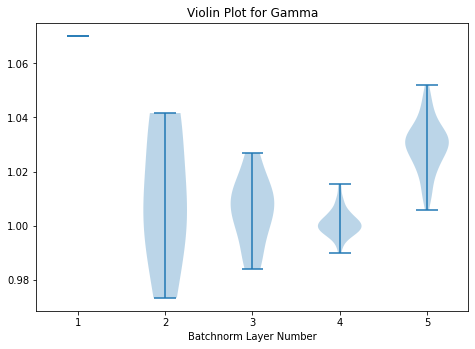

In [20]:
# violin plot for weights & biases
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gamma = ax.violinplot(bn_weights)

plt.title("Violin Plot for Gamma")
plt.xlabel("Batchnorm Layer Number")
plt.show()

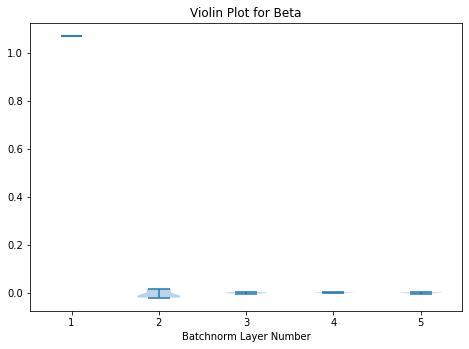

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
beta = ax.violinplot(bn_bias)
plt.title("Violin Plot for Beta")
plt.xlabel("Batchnorm Layer Number")
plt.show()

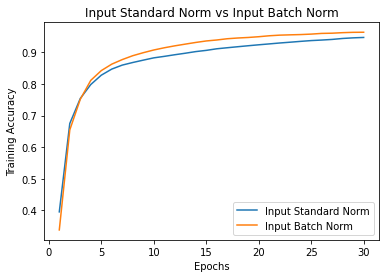

In [22]:
plt.title("Input Standard Norm vs Input Batch Norm")
plt.ylabel("Training Accuracy")
plt.xlabel("Epochs")

plt.plot(range(1, epochs+1), p2_train_accuracy, label="Input Standard Norm")
plt.plot(range(1, epochs+1), p3_train_accuracy, label="Input Batch Norm")
plt.legend()

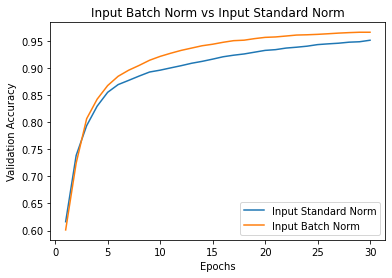

In [23]:
plt.title("Input Batch Norm vs Input Standard Norm")
plt.ylabel("Validation Accuracy")
plt.xlabel("Epochs")

plt.plot(range(1, epochs+1), p2_validation_accuracy, label="Input Standard Norm")
plt.plot(range(1, epochs+1), p3_validation_accuracy, label="Input Batch Norm")

plt.legend()

# Part 4

In [24]:
train_dataset = datasets.MNIST(root="MNIST", train=True, transform=p4_transformations, download=True)
val_dataset = datasets.MNIST(root="MNIST", train=False, transform=p4_transformations, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=True, num_workers=2)


In [25]:
p4_train_loss = []
p4_validation_loss = []
p4_train_accuracy = []
p4_validation_accuracy = []

model = LeNet_Dropout().to(device)
optimizer = optim.SGD(model.parameters(), lr=lr)


for epoch in range(epochs):

    # Training Phase
    print(f"[Training] Epoch: {epoch}")
    train_loss, train_acc = train(model, train_loader, optimizer, device)

    # Validation Phase
    print(f"[Validation] Epoch: {epoch}")
    val_loss, val_acc = validate(model, val_loader, device)

    p4_train_loss.append(train_loss)
    p4_validation_loss.append(val_loss)
    p4_train_accuracy.append(train_acc)
    p4_validation_accuracy.append(val_acc)


[Training] Epoch: 0
[Training] Loss: 2.3023909056345624, Accuracy: 0.10571666666666667
[Validation] Epoch: 0
[Validation] Loss: 2.3021227882385253, Accuracy: 0.1051
[Training] Epoch: 1
[Training] Loss: 2.302122416941325, Accuracy: 0.11133333333333334
[Validation] Epoch: 1
[Validation] Loss: 2.3018608699798584, Accuracy: 0.1106
[Training] Epoch: 2
[Training] Loss: 2.301886088180542, Accuracy: 0.11466666666666667
[Validation] Epoch: 2
[Validation] Loss: 2.3015948848724364, Accuracy: 0.1174
[Training] Epoch: 3
[Training] Loss: 2.3015485928853354, Accuracy: 0.12081666666666667
[Validation] Epoch: 3
[Validation] Loss: 2.301323781967163, Accuracy: 0.1277
[Training] Epoch: 4
[Training] Loss: 2.3013913138071698, Accuracy: 0.12281666666666667
[Validation] Epoch: 4
[Validation] Loss: 2.301049450302124, Accuracy: 0.1376
[Training] Epoch: 5
[Training] Loss: 2.301148839441935, Accuracy: 0.12786666666666666
[Validation] Epoch: 5
[Validation] Loss: 2.300767194747925, Accuracy: 0.1472
[Training] Epoch

In [26]:
print(model)

LeNet_Dropout(
  (convlayers): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (2): Tanh()
    (3): Dropout(p=0.5, inplace=False)
    (4): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (5): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (6): Tanh()
    (7): Dropout(p=0.5, inplace=False)
    (8): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (9): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (10): Tanh()
    (11): Dropout(p=0.5, inplace=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): Tanh()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=84, out_features=10, bias=True)
    (4): Softmax(dim=1)
  )
)


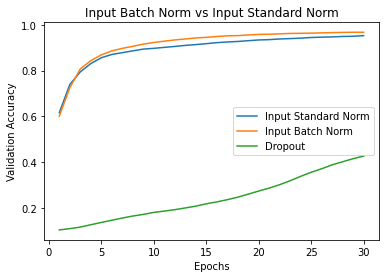

In [27]:
plt.title("Input Batch Norm vs Input Standard Norm")
plt.ylabel("Validation Accuracy")
plt.xlabel("Epochs")

plt.plot(range(1, epochs+1), p2_validation_accuracy, label="Input Standard Norm")
plt.plot(range(1, epochs+1), p3_validation_accuracy, label="Input Batch Norm")
plt.plot(range(1, epochs+1), p4_validation_accuracy, label="Dropout")

plt.legend()

# Part 5

In [28]:
train_dataset = datasets.MNIST(root="MNIST", train=True, transform=p5_transformations, download=True)
val_dataset = datasets.MNIST(root="MNIST", train=False, transform=p5_transformations, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=True, num_workers=2)


In [29]:
p5_train_loss = []
p5_validation_loss = []
p5_train_accuracy = []
p5_validation_accuracy = []

model = LeNet_DropoutBatchNorm().to(device)
optimizer = optim.SGD(model.parameters(), lr=lr)


for epoch in range(epochs):

    # Training Phase
    print(f"[Training] Epoch: {epoch}")
    train_loss, train_acc = train(model, train_loader, optimizer, device)

    # Validation Phase
    print(f"[Validation] Epoch: {epoch}")
    val_loss, val_acc = validate(model, val_loader, device)

    p5_train_loss.append(train_loss)
    p5_validation_loss.append(val_loss)
    p5_train_accuracy.append(train_acc)
    p5_validation_accuracy.append(val_acc)


[Training] Epoch: 0
[Training] Loss: 2.2921285919189454, Accuracy: 0.13293333333333332
[Validation] Epoch: 0
[Validation] Loss: 2.2562203121185305, Accuracy: 0.3816
[Training] Epoch: 1
[Training] Loss: 2.260658494695028, Accuracy: 0.21598333333333333
[Validation] Epoch: 1
[Validation] Loss: 2.1856263221740724, Accuracy: 0.5886
[Training] Epoch: 2
[Training] Loss: 2.2169185544331866, Accuracy: 0.3156833333333333
[Validation] Epoch: 2
[Validation] Loss: 2.105255342102051, Accuracy: 0.63
[Training] Epoch: 3
[Training] Loss: 2.167672726313273, Accuracy: 0.4025
[Validation] Epoch: 3
[Validation] Loss: 2.034618440246582, Accuracy: 0.6511
[Training] Epoch: 4
[Training] Loss: 2.1202824049631754, Accuracy: 0.46418333333333334
[Validation] Epoch: 4
[Validation] Loss: 1.9787419494628906, Accuracy: 0.67
[Training] Epoch: 5
[Training] Loss: 2.0767000586191813, Accuracy: 0.5133166666666666
[Validation] Epoch: 5
[Validation] Loss: 1.9310132040023804, Accuracy: 0.6847
[Training] Epoch: 6
[Training] Lo

In [30]:
print(model)

LeNet_DropoutBatchNorm(
  (convlayers): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (2): Tanh()
    (3): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Dropout(p=0.5, inplace=False)
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (7): Tanh()
    (8): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Dropout(p=0.5, inplace=False)
    (10): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (11): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (12): Tanh()
    (13): BatchNorm2d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): Dropout(p=0.5, inplace=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): Tanh()
    (2): BatchNorm1d(84, eps=1e-05, mome

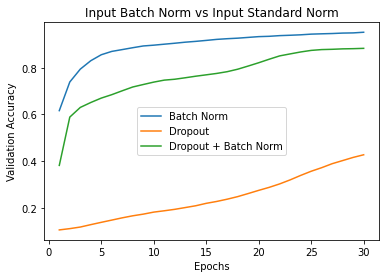

In [31]:
plt.title("Input Batch Norm vs Input Standard Norm")
plt.ylabel("Validation Accuracy")
plt.xlabel("Epochs")

plt.plot(range(1,  epochs+1), p2_validation_accuracy, label="Batch Norm")
plt.plot(range(1,  epochs+1), p4_validation_accuracy, label="Dropout")
plt.plot(range(1,  epochs+1), p5_validation_accuracy, label="Dropout + Batch Norm")

plt.legend()